In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

https://www.kaggle.com/code/samuelcortinhas/gaussian-mixture-model-gmm-from-the-ground-up

## 1-d data with two clusters

### Generate data

In [72]:
# real parameters
w1, w2 = 0.1, 0.9
mu1, mu2 = 1.0, 30.0
sig1, sig2 = 0.5, 4.0
n1,n2 = 1000, 1700

# generate random normal
x1,x2 = np.random.normal(mu1, sig1, n1),np.random.normal(mu2, sig2, n2)
x = np.append(x1 ,x2)

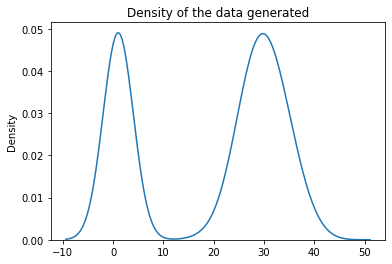

In [73]:
sns.kdeplot(x)
plt.title('Density of the data generated')
plt.show()

### EM Algo

In [77]:
def likelihood(x, mu, sigma):
    
    return (1/(2*np.pi * sigma **2)) * np.exp(- (x - mu)**2 / (2* sigma ** 2))

In [80]:
### generate random params
# tmp_mu1, tmp_mu2 = np.random.uniform(min(x),max(x)),np.random.uniform(min(x),max(x))
# tmp_sig1, tmp_sig2 = np.random.uniform(0.01,np.std(x)), np.random.uniform(0.01,np.std(x))
tmp_mu1, tmp_mu2 = 0.0, 10.0
tmp_sig1, tmp_sig2 = 1.0, 2.0
p1 = np.random.uniform(0,1)
p2 = 1 - p1
number_of_iterations = 10
n = len(x)

for i in range(number_of_iterations):
    if np.isnan(tmp_mu1):
        break
    print("distrib 1: (%.2f,%.2f)" % (tmp_mu1, tmp_sig1))
    print("distrib 2: (%.2f,%.2f)" % (tmp_mu2, tmp_sig2))
    posteriors = []
    # step 1: compute posterior probability
    for xi in x:
        l1 = likelihood(xi, tmp_mu1, tmp_sig1)
        l2 = likelihood(xi, tmp_mu2, tmp_sig2)
        
        post1 = l1 * p1 / (l1 * p1 + l2 * p2)
        post2 = l2 * p2 / (l1 * p1 + l2 * p2)
        posteriors.append([post1, post2])
    
    posteriors = np.array(posteriors)
    tmp_mu1, tmp_mu2 = (1/sum(posteriors[:,0])) * np.dot(posteriors[:,0], x), (1/sum(posteriors[:,1])) * np.dot(posteriors[:,1], x)
    tmp_sig1 = (1/sum(posteriors[:,0])) * np.dot(posteriors[:,0], (x - tmp_mu1)**2)
    tmp_sig2 = (1/sum(posteriors[:,1])) * np.dot(posteriors[:,1], (x - tmp_mu2)**2)
    p1, p2 = sum(posteriors[:,0]) / n, sum(posteriors[:,1]) / n
    
    

distrib 1: (0.00,1.00)
distrib 2: (10.00,2.00)
distrib 1: (1.01,0.27)
distrib 2: (30.02,17.34)
distrib 1: (1.00,0.22)
distrib 2: (29.44,33.38)
distrib 1: (1.00,0.19)
distrib 2: (28.92,47.13)
distrib 1: (1.00,0.17)
distrib 2: (28.47,58.69)
distrib 1: (0.99,0.15)
distrib 2: (28.02,70.01)
distrib 1: (0.99,0.13)
distrib 2: (27.47,83.00)
distrib 1: (0.99,0.11)
distrib 2: (26.84,97.48)
distrib 1: (0.99,0.09)
distrib 2: (26.09,113.37)
distrib 1: (0.99,0.07)
distrib 2: (24.99,134.86)


In [106]:
df = pd.DataFrame([list(x), list(np.argmax(posteriors,axis=1))]).T.rename(columns={0:'x', 1:'assigned_cluster'})

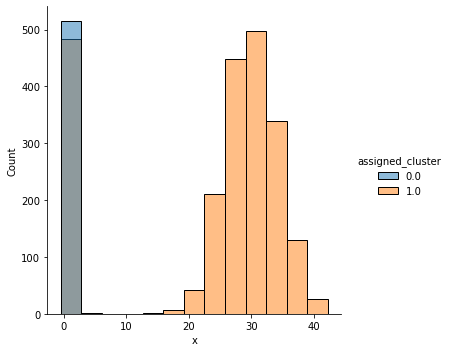

In [107]:
sns.displot(data=df, x='x', hue='assigned_cluster')

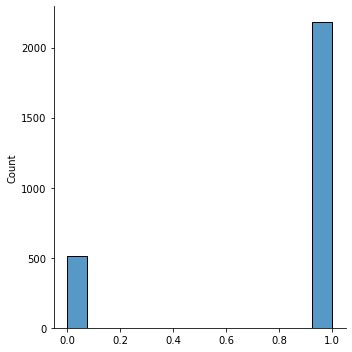

In [111]:
sns.displot(np.argmax(posteriors,axis=1))

<AxesSubplot:>

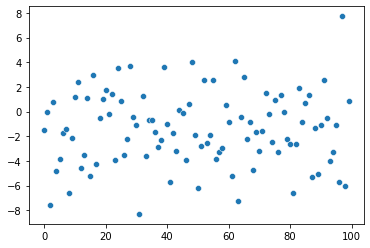

In [11]:
sns.scatterplot(x=range(100), y=np.random.normal(-1, 3, 100))